In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./kddcup.data")
cols = "duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack".split(",")
df.columns = cols 
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [3]:
df_crypt = pd.read_csv('./cryptomining_kdd.csv')
df_crypt.index += 4898429
df_crypt

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
4898429,3,udp,domain_u,S0,85,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
4898430,0,tcp,other,OTH,0,0,0,0,0,0,...,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
4898431,0,tcp,other,OTH,0,0,0,0,0,0,...,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
4898432,0,tcp,other,OTH,0,0,0,0,0,0,...,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
4898433,5,tcp,other,OTH,5850,0,0,0,0,0,...,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cryptomining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899025,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
4899026,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
4899027,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining
4899028,0,udp,domain_u,S0,0,0,0,0,0,0,...,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,cryptomining


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [5]:
df['attack'].value_counts()

attack
smurf.              2807886
neptune.            1072017
normal.              972780
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [6]:
# This DataFrame appears to be based on the KDD Cup 1999 / NSL-KDD intrusion detection dataset.
# Each column represents a feature of network connections, used for detecting attacks or anomalies:
#
# Basic Connection Features:
# duration                      : Length (in seconds) of the connection.
# protocol_type                 : Transport protocol used (TCP, UDP, ICMP).
# service                       : Destination network service (e.g., http, ftp, telnet).
# flag                          : Status flag of the connection (e.g., SF, REJ, RSTO).
# src_bytes                     : Bytes sent from source to destination.
# dst_bytes                     : Bytes sent from destination to source.
# land                          : 1 if source and destination IP/port are the same (LAND attack indicator).
# wrong_fragment                : % of wrong/malformed IP fragments.
# urgent                        : % of urgent packets (rare in normal traffic).
#
# Content Features (Within a Connection):
# hot                           : % of “hot” indicators (suspicious activities or system calls).
# num_failed_logins             : % of failed login attempts.
# logged_in                     : 1 if login was successful, 0 otherwise.
# num_compromised               : % of compromised conditions observed.
# root_shell                    : 1 if root shell was obtained, 0 otherwise.
# su_attempted                  : 1 if "su root" (superuser) was attempted.
# num_root                      : % of accesses to root-level files/processes.
# num_file_creations            : % of files created during the connection.
# num_shells                    : % of shell prompts invoked.
# num_access_files              : % of operations on access-control files (e.g., /etc/passwd).
# num_outbound_cmds             : % of outbound commands executed (always 0 in KDD dataset).
# is_host_login                 : 1 if login belongs to a host account.
# is_guest_login                : 1 if login used a guest account.
#
# Traffic Features (Same Host / Same Service in short time window):
# count                         : % of connections to the same host in the past 2 seconds.
# srv_count                     : % of connections to the same service in past 2 seconds.
# serror_rate                   : % of connections with SYN errors.
# srv_serror_rate               : % of connections with SYN errors to the same service.
# rerror_rate                   : % of connections with REJ errors.
# srv_rerror_rate               : % of REJ errors to the same service.
# same_srv_rate                 : % of connections to the same service.
# diff_srv_rate                 : % of connections to different services.
# srv_diff_host_rate            : % of connections to same service but different hosts.
#
# Host-Level Traffic Features (Aggregated over last 100 connections):
# dst_host_count                : % of connections to the same destination host.
# dst_host_srv_count            : % of connections to the same service on the same host.
# dst_host_same_srv_rate        : % of connections to the same service for the destination host.
# dst_host_diff_srv_rate        : % of connections to different services for the destination host.
# dst_host_same_src_port_rate   : % of connections to same port from same source.
# dst_host_srv_diff_host_rate   : % of connections to same service from different hosts.
# dst_host_serror_rate          : % of connections to the host with SYN errors.
# dst_host_srv_serror_rate      : % of connections to same service with SYN errors.
# dst_host_rerror_rate          : % of connections to the host with REJ errors.
# dst_host_srv_rerror_rate      : % of connections to same service with REJ errors.
#
# Label:
# attack                        : Class label for the connection ('normal.' or a specific attack type such as 'smurf.', 'neptune.', etc.).


In [7]:
attack_types = [
    'back.',            # Backdoor: attacker installs or enables secret remote access (a "backdoor") so they can later control the machine without normal authentication. Look for unusual listening services, unknown user accounts, or persistent startup entries.
    'buffer_overflow.', # Buffer overflow: attacker crafts input that overruns memory buffers to overwrite program state and execute arbitrary code (often leads to remote code execution). Signs: crashes, weird process behavior, or exploit attempts in application logs.
    'cryptomining',      # Testing for 
    'ftp_write.',       # FTP write: attacker authenticates or exploits an FTP server to upload or modify files (webshells, malware, or data tampering). Detection: unexpected new/modified files on FTP dirs or file uploads from unusual IPs.
    'guess_passwd.',    # Guessing passwords (brute force): automated attempts to discover credentials by trying many username/password combos. Detection: lots of failed login attempts, many distinct sources, or rapid repeated attempts from one IP.
    'imap.',            # IMAP attacks: attempts targeting IMAP mail servers (credential stuffing, brute force, or exploiting server bugs) to read/steal mail or use mail service as pivot. Watch for abnormal IMAP logins, unusual IPs, or excessive mailbox access.
    'ipsweep.',         # IP sweep: scanner probes a range of IP addresses to find hosts that respond (basic reconnaissance). Detection: many connection attempts across consecutive IPs and short time windows.
    'land.',            # LAND DoS: forged packets with the same source and destination IP/port (src==dst) that confuse some TCP/IP stacks and may crash or hang the target. Detection: packets where source==destination or peculiar TCP resets/crashes.
    'loadmodule.',      # Load module attack: attacker attempts to upload and load a malicious kernel/module or server module (executes code in privileged context). Look for suspicious module loads, new binaries, or privilege-escalation attempts.
    'multihop.',        # Multihop (proxying/pivoting): attacker routes access via one or more compromised machines to hide origin and reach otherwise inaccessible systems. Indicators: strange relay connections, tunnels, or unusual intermediate hosts in logs.
    'neptune.',         # Neptune (SYN flood): classic TCP SYN flood that sends many connection requests without completing handshakes, exhausting connection tables and causing DoS. Symptoms: many half-open connections and resource exhaustion on the target.
    'nmap.',            # Nmap scanning: active port/service/OS scanning with the nmap tool (reconnaissance to discover services and vulnerabilities). Detection: diverse ports probed from same IP, fingerprinting patterns or TTL/packet patterns matching nmap.
    'normal.',          # Normal traffic: legitimate, benign network activity — not an attack. Helpful as baseline for anomaly detection.
    'perl.',            # Perl/CGI script attacks: exploitation of Perl-based CGI scripts or server-side Perl apps to run arbitrary commands or upload malware. Watch for suspicious HTTP requests invoking CGI scripts or file writes from webserver processes.
    'phf.',             # phf CGI exploit: a historical web CGI vulnerability (phf) where specially crafted requests could execute commands on the server. Detection: web requests with unusual query payloads to phf or unexpected command output/files.
    'pod.',             # POD (Ping of Death / Packet of Death): sending oversized or malformed ICMP packets that cause older systems to crash or reboot. Symptoms: malformed ICMP traffic and sudden crashes/reboots after such packets.
    'portsweep.',       # Port sweep: scanning many ports across one or more hosts to find available services (more focused than IPSweep). Detect by seeing many connection attempts to different ports from the same source.
    'rootkit.',         # Rootkit: stealthy malware installed at high (often kernel) privilege to hide attacker presence and maintain persistent control. Look for hidden processes, altered system binaries, unusual kernel modules, or tampered audit logs.
    'satan.',           # SATAN scanner activity: use of the SATAN vulnerability scanner to enumerate known weaknesses (historical tool similar to Nessus). Detection: a set of targeted probes for known vulnerabilities and misconfigurations.
    'smurf.',           # Smurf attack: amplification DoS using spoofed ICMP echo requests sent to broadcast addresses which then flood the victim with replies. Detection: many ICMP replies from broadcast networks with spoofed source IPs.
    'spy.',             # Spy / sniffing activity: passive capture of network traffic or installation of spyware to steal credentials/data. Indicators: suspicious promiscuous-mode network interfaces, odd packet captures, or data exfiltration.
    'teardrop.',        # Teardrop: DoS that sends overlapping or malformed IP fragments which crash or confuse vulnerable IP reassembly code. Symptoms: fragmented packets with invalid offsets and crashes/restarts on affected systems.
    'warezclient.',     # Warez client behavior: client machines contacting servers to download pirated software — in IDS datasets this often signals suspicious P2P or illicit file-sharing activity which can correlate with other threats. Look for repeated connections to known warez servers or P2P ports.
    'warezmaster.'      # Warez master: server/operator coordinating the distribution of pirated software (the source/origin of warez). Detection: servers receiving many upload requests or hosting many illicit files and responding to many download clients.
]


In [8]:
def prep_df(df, binary=False) -> pd.DataFrame:
    def cat_col(df, cols):
        ret = df.copy()
        for c in cols:
            ret[c] = df[c].astype('category').cat.codes
        return ret
    
    ret = cat_col(df, ["protocol_type", "service", "flag", "attack"])
    if binary:
        ret['attack'] = np.where(ret['attack'] == 11, 0, 1)
    return ret

In [26]:
def create_model(df=None, train_test=None, num_estimators=100, random_state=47, show_scores=False, show_fails=False, binary=False):
    if type(df) == pd.DataFrame:
        X, y = df.drop(columns=["attack"]), df['attack']
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

    if train_test != None:
        X_train, X_test, y_train, y_test = train_test

    # Create a RandomForestClassifier instance
    # n_estimators: number of trees in the forest
    # random_state: for reproducibility
    rf_classifier = RandomForestClassifier(n_estimators=5, random_state=random_state)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)
    
    if show_scores:

        accuracy = accuracy_score(y_test, y_pred)
        print(f"\t\tAccuracy: {accuracy}")

        precision = precision_score(y_test, y_pred) if binary else precision_score(y_test, y_pred, average='micro')
        print(f"\t\tPrecision: {precision}")

    
    # Identify misclassified samples
    misclassified = (y_test != y_pred)

    # Count failures per true class index
    fail_counts = np.bincount(y_test[misclassified], minlength=len(attack_types))

    ret_fails = { attack_types[i]: fail_counts[i]
                for i in range(len(fail_counts)) if fail_counts[i] > 0 }

        
    return (y_test, y_pred, ret_fails)

In [21]:
def test_learn_time(df, df_crypt, additive_range=range(1, 101, 10),
                    split_frac=.8, test_start=202, num_est=10, 
                    new_attack="normal.", debug=False, stop_at_data=False):

    crypt_acc = []
    model_acc = []
    model_pre = []
    model_f1 = []

    for d in additive_range:
        crypt_acc_s = []
        model_acc_s = []
        model_pre_s = []
        model_f1_s = []

        split = int(split_frac * len(df))
        d_percent = float(d) / float(len(df_crypt))
        if debug:
            print(f"   {d=}")

        # Base split
        # df_train = df[:split]
        # df_test = df[split:]

        df_train, df_test = train_test_split(df, train_size=float(split_frac))

        df_crypt_train, df_crypt_test = train_test_split(df_crypt, train_size=float(d_percent))

        # Add d crypt samples to train
        # train_data = pd.concat([df_train, df_crypt.iloc[:d]])
        train_data = pd.concat([df_train, df_crypt_train])
        X_train = train_data.drop(columns=['attack'])
        y_train = train_data['attack']

        # Test data includes all remaining crypt points
        # test_data = pd.concat([df_test, df_crypt.iloc[test_start:]])
        test_data = pd.concat([df_test, df_crypt_test])
        X_test = test_data.drop(columns=['attack'])
        y_test_true = test_data['attack']

        if stop_at_data:
            return X_train, X_test, y_train, y_test_true

        for seed in range(3):            

            if debug:
                print(f"\tStarting Model {seed}")

            # Do NOT overwrite y_test_true
            _, y_pred, _ = create_model(
                train_test=[X_train, X_test, y_train, y_test_true],
                num_estimators=num_est,
                show_scores=debug,
                random_state=seed
            )

            # Metric: recall on the new attack class
            new_attack_recall = recall_score(
                y_test_true, y_pred, labels=[new_attack], average='weighted', zero_division=0
            )

            print(f"\tNew Recall {new_attack_recall}")

            crypt_acc_s.append(new_attack_recall)
            model_acc_s.append(accuracy_score(y_test_true, y_pred))
            model_pre_s.append(precision_score(y_test_true, y_pred, average='weighted', zero_division=0))
            model_f1_s.append(f1_score(y_test_true, y_pred, average='weighted', zero_division=1))

        crypt_acc.append(np.mean(crypt_acc_s))
        model_acc.append(np.mean(model_acc_s))
        model_pre.append(np.mean(model_pre_s))
        model_f1.append(np.mean(model_f1_s))

    return crypt_acc, model_acc, model_pre, model_f1


In [11]:
df_total = pd.concat([df, df_crypt])
df_total_clean = prep_df(df_total)

In [35]:
def total_testing(df_total, debug=False):
    results = []
    for c in range(24):
        # if c >= 3:
        #     break

        atk_name = attack_types[c]
        df_other = df_total[df_total['attack'] != c]
        df_new = df_total[df_total['attack'] == c]
        if len(df_new) < 300:
            print(f"{atk_name} skipped")
            continue
        new_range = range(1, 20)
        results.append((atk_name, test_learn_time(df=df_other, df_crypt=df_new, additive_range=new_range, num_est=10, test_start=new_range[-1], new_attack=atk_name, debug=debug)))
        print(f"{atk_name} testing done")
    return results 

In [36]:
res = total_testing(df_total=df_total_clean, debug=True)

   d=1
	Starting Model 0
		Accuracy: 0.999619995761883
		Precision: 0.999619995761883
	New Recall 0.0
	Starting Model 1
		Accuracy: 0.9981560116059203
		Precision: 0.9981560116059203
	New Recall 0.0
	Starting Model 2
		Accuracy: 0.999413183803873
		Precision: 0.999413183803873
	New Recall 0.0
   d=2
	Starting Model 0
		Accuracy: 0.9988620236825403
		Precision: 0.9988620236825403
	New Recall 0.0
	Starting Model 1
		Accuracy: 0.9977647985313279
		Precision: 0.9977647985313279
	New Recall 0.0
	Starting Model 2
		Accuracy: 0.9993520564566657
		Precision: 0.9993520564566657
	New Recall 0.0
   d=3
	Starting Model 0
		Accuracy: 0.9995405301324618
		Precision: 0.9995405301324618
	New Recall 0.0
	Starting Model 1
		Accuracy: 0.999345943115389
		Precision: 0.999345943115389
	New Recall 0.0
	Starting Model 2
		Accuracy: 0.9991656190210337
		Precision: 0.9991656190210337
	New Recall 0.0
   d=4
	Starting Model 0
		Accuracy: 0.9997534549418531
		Precision: 0.9997534549418531
	New Recall 0.0
	Startin

ValueError: x and y must have same first dimension, but have shapes (9,) and (19,)

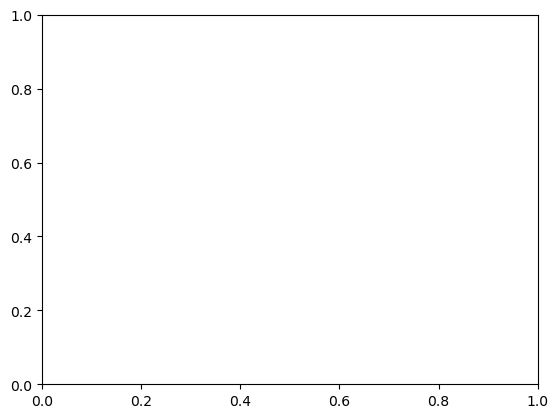

In [37]:
plot_names = ["Recall", "Accuracy", "Precision", "F1 Score"]

for i in range(4):
    for v in res:
        lab = v[0]
        data = v[1][i]
        # while len(data) < 6:
        #     data.append(np.nan)
        plt.plot(range(1, 10), data, label=lab)    

    plt.title(f"{plot_names[i]} by percent allotted training data points per Attack Type")
    plt.xlabel("Percent allotted training data points")
    plt.ylabel(f"{plot_names[i]}")

    # plt.ylim((0, 1))

    plt.legend(loc="center left", bbox_to_anchor=(1, .5))

    plt.savefig(f"./plots/range(1..20)/{plot_names[i]}.png")
    plt.show()

In [ ]:
res